In [ ]:
### K-Nearest Neighbors (KNN) and Principal Component Analysis (PCA) Assignment

#### 1. What is K-Nearest Neighbors (KNN) and how does it work?
K-Nearest Neighbors (KNN) is a non-parametric, instance-based machine learning algorithm used for classification and regression. It classifies a data point based on the majority label of its K nearest neighbors, using a chosen distance metric.

#### 2. What is the difference between KNN Classification and KNN Regression?
- **KNN Classification:** Assigns the class label based on the majority vote among K nearest neighbors.
- **KNN Regression:** Predicts the output as the average of the K nearest neighbors’ numerical values.

#### 3. What is the role of the distance metric in KNN?
The distance metric determines how the algorithm finds the nearest neighbors. Common metrics include:
- **Euclidean Distance:** \( \sqrt{\sum (x_i - y_i)^2} \)
- **Manhattan Distance:** \( \sum |x_i - y_i| \)
- **Minkowski Distance:** Generalization of Euclidean and Manhattan

#### 4. What is the Curse of Dimensionality in KNN?
As the number of dimensions increases, the data points become sparse, making distance-based methods less effective. This leads to higher computation time and reduced accuracy.

#### 5. How can we choose the best value of K in KNN?
- Use cross-validation to find an optimal K.
- A small K may lead to overfitting, while a large K may cause underfitting.
- Common practice: Choose an odd K to avoid ties in classification.

#### 6. What are KD Tree and Ball Tree in KNN?
- **KD Tree:** A space-partitioning data structure that organizes points in k-dimensional space for efficient nearest-neighbor searches.
- **Ball Tree:** Uses hyperspheres (balls) instead of hyperplanes for organizing data, useful for non-uniform data distributions.

#### 7. When should you use KD Tree vs. Ball Tree?
- **KD Tree:** Works best for low-dimensional data.
- **Ball Tree:** Preferred for high-dimensional, non-uniform data.

#### 8. What are the disadvantages of KNN?
- Computationally expensive for large datasets.
- Sensitive to irrelevant or redundant features.
- Requires proper feature scaling.

#### 9. How does feature scaling affect KNN?
Feature scaling ensures that all features contribute equally to distance calculations, preventing dominance by large-magnitude features.

#### 10. What is PCA (Principal Component Analysis)?
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

#### 11. How does PCA work?
1. Standardize the dataset.
2. Compute the covariance matrix.
3. Compute eigenvalues and eigenvectors.
4. Select principal components based on explained variance.
5. Transform the data into the new feature space.

#### 12. What is the geometric intuition behind PCA?
PCA finds the directions (principal components) along which the variance in the data is maximized. It projects data onto these directions to reduce dimensions.

#### 13. What is the difference between Feature Selection and Feature Extraction?
- **Feature Selection:** Selects a subset of existing features.
- **Feature Extraction:** Creates new features from transformations (e.g., PCA).

#### 14. What are Eigenvalues and Eigenvectors in PCA?
- **Eigenvalues:** Indicate the variance explained by each principal component.
- **Eigenvectors:** Define the direction of principal components.

#### 15. How do you decide the number of components to keep in PCA?
- Use the explained variance ratio (e.g., keep components that explain 95% of the variance).
- Use a scree plot to identify the “elbow point.”

#### 16. Can PCA be used for classification?
PCA itself is not a classifier but can be used for feature reduction before applying classification algorithms.

#### 17. What are the limitations of PCA?
- Assumes linear relationships between features.
- Sensitive to feature scaling.
- Reduces interpretability of features.

#### 18. How do KNN and PCA complement each other?
PCA reduces dimensionality, helping KNN mitigate the curse of dimensionality, leading to faster computation and improved accuracy.

#### 19. How does KNN handle missing values in a dataset?
- Imputation: Replace missing values with mean/median/mode.
- Remove missing data points.
- Use distance metrics that can handle missing values.

#### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
- **PCA:** Unsupervised, focuses on maximizing variance.
- **LDA:** Supervised, maximizes class separability.





Question 21: Train a KNN Classifier on the Iris dataset and print model accuracy
KNN Classifier Accuracy on Iris Dataset: 1.0000

Question 22: Train a KNN Regressor on a synthetic dataset and evaluate using MSE
KNN Regressor MSE: 1432.6378

Question 23: Train a KNN Classifier using different distance metrics
KNN Classifier Accuracy with euclidean distance: 1.0000
KNN Classifier Accuracy with manhattan distance: 1.0000

Question 24: Train a KNN Classifier with different values of K and visualize decision boundaries


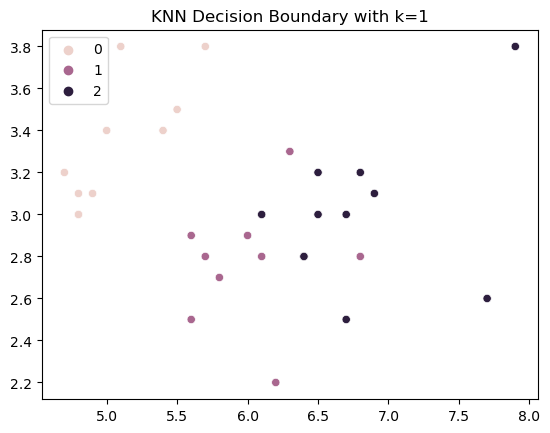

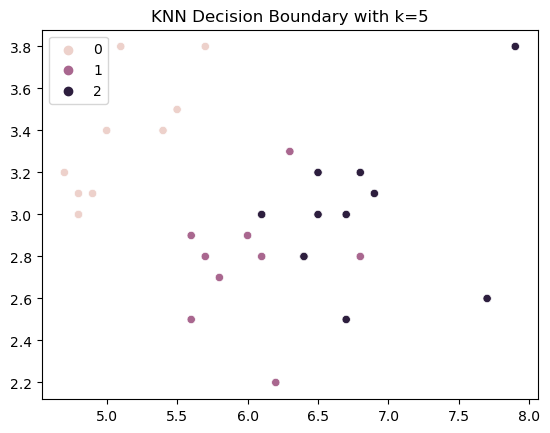

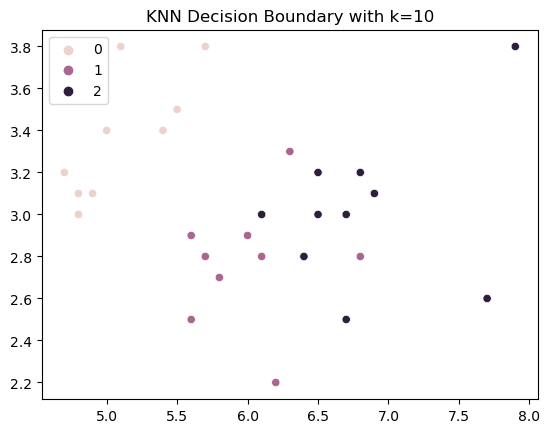


Question 25: Apply Feature Scaling before training a KNN model and compare results
Accuracy with scaling: 1.0000, without scaling: 1.0000


In [5]:
##PRACTICAL IMPLEMENTATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Question 21: Train a KNN Classifier on the Iris dataset and print model accuracy
print("\nQuestion 21: Train a KNN Classifier on the Iris dataset and print model accuracy")
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy on Iris Dataset: {accuracy:.4f}")

# Question 22: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
print("\nQuestion 22: Train a KNN Regressor on a synthetic dataset and evaluate using MSE")
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"KNN Regressor MSE: {mse:.4f}")

# Question 23: Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
print("\nQuestion 23: Train a KNN Classifier using different distance metrics")
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN Classifier Accuracy with {metric} distance: {acc:.4f}")

# Question 24: Train a KNN Classifier with different values of K and visualize decision boundaries
print("\nQuestion 24: Train a KNN Classifier with different values of K and visualize decision boundaries")
k_values = [1, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:, :2], y_train)  # Using first two features for visualization
    plt.figure()
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)
    plt.title(f"KNN Decision Boundary with k={k}")
    plt.show()

# Question 25: Apply Feature Scaling before training a KNN model and compare results with unscaled data
print("\nQuestion 25: Apply Feature Scaling before training a KNN model and compare results")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled:.4f}, without scaling: {accuracy:.4f}")



Question 26: Train a PCA model on synthetic data and print the explained variance ratio
Explained Variance Ratio: [0.25469562 0.17917489 0.12851343 0.1128892  0.09500369]

Question 27: Apply PCA before training a KNN Classifier and compare accuracy
Accuracy with PCA: 1.0000, without PCA: 1.0000

Question 28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}

Question 29: Train a KNN Classifier and check the number of misclassified samples
Number of Misclassified Samples: 0

Question 30: Train a PCA model and visualize the cumulative explained variance


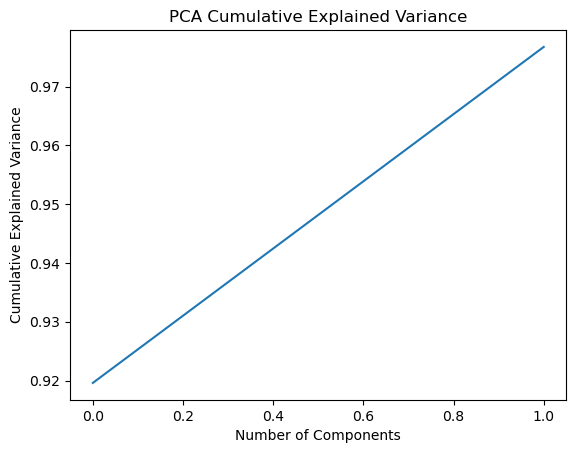


Question 31: Train a KNN Classifier using different values of the weights parameter
KNN Classifier Accuracy with uniform weights: 1.0000
KNN Classifier Accuracy with distance weights: 1.0000


In [7]:
# Question 26: Train a PCA model on synthetic data and print the explained variance ratio
print("\nQuestion 26: Train a PCA model on synthetic data and print the explained variance ratio")
X_pca, _ = make_classification(n_samples=200, n_features=10, random_state=42)
pca = PCA(n_components=5)
pca.fit(X_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Question 27: Apply PCA before training a KNN Classifier and compare accuracy
print("\nQuestion 27: Apply PCA before training a KNN Classifier and compare accuracy")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca:.4f}, without PCA: {accuracy:.4f}")

# Question 28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
print("\nQuestion 28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV")
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

# Question 29: Train a KNN Classifier and check the number of misclassified samples
print("\nQuestion 29: Train a KNN Classifier and check the number of misclassified samples")
misclassified = (y_test != y_pred).sum()
print(f"Number of Misclassified Samples: {misclassified}")

# Question 30: Train a PCA model and visualize the cumulative explained variance
print("\nQuestion 30: Train a PCA model and visualize the cumulative explained variance")
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.show()

# Question 31: Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
print("\nQuestion 31: Train a KNN Classifier using different values of the weights parameter")
for weight in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=3, weights=weight)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN Classifier Accuracy with {weight} weights: {acc:.4f}")



Question 32: Train a KNN Regressor and analyze the effect of different K values on performance
K=1, MSE: 1731.9380
K=3, MSE: 1213.3784
K=5, MSE: 1432.6378
K=7, MSE: 1601.1122
K=9, MSE: 1704.7272

Question 33: Implement KNN Imputation for handling missing values in a dataset
Before Imputation:  10  missing values
After Imputation:  0  missing values

Question 34: Train a PCA model and visualize the data projection onto the first two principal components


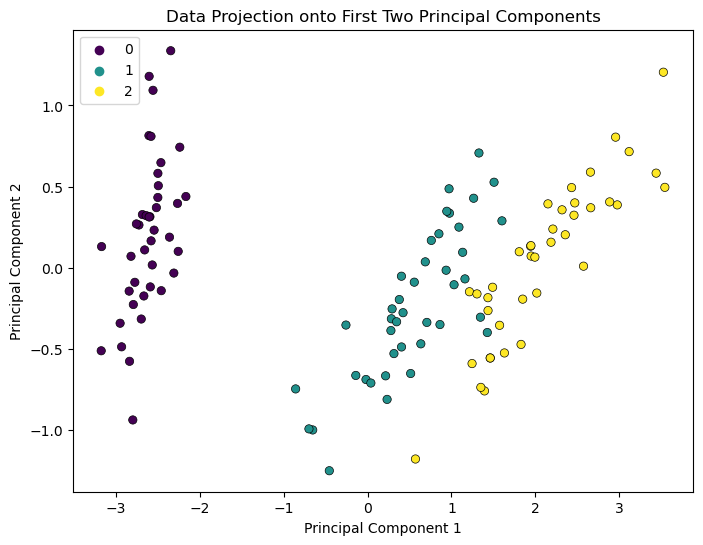


Question 35: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
Accuracy with KD Tree: 1.0000, Accuracy with Ball Tree: 1.0000

Question 36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot


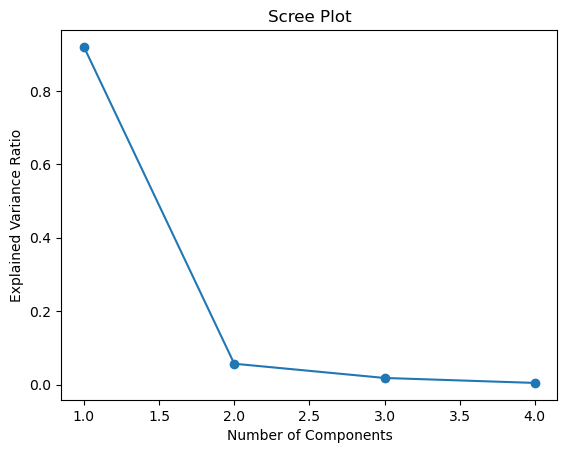


Question 37: Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Question 38: Train a PCA model and analyze the effect of different numbers of components on accuracy
Accuracy with 1 PCA components: 0.9333
Accuracy with 2 PCA components: 1.0000
Accuracy with 3 PCA components: 1.0000
Accuracy with 4 PCA components: 1.0000


In [15]:
print("\nQuestion 32: Train a KNN Regressor and analyze the effect of different K values on performance")

k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"K={k}, MSE: {mse:.4f}")
    
print("\nQuestion 33: Implement KNN Imputation for handling missing values in a dataset")

# Creating a synthetic dataset with missing values
data_with_nan = X_train.copy()
data_with_nan[:10, 0] = np.nan  # Introduce NaN values in the first column

# Applying KNN Imputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_with_nan)

# Checking if NaN values are imputed
print("Before Imputation: ", np.isnan(data_with_nan).sum(), " missing values")
print("After Imputation: ", np.isnan(data_imputed).sum(), " missing values")
print("\nQuestion 34: Train a PCA model and visualize the data projection onto the first two principal components")

pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="viridis", edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projection onto First Two Principal Components")
plt.show()

# Question 35: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
print("\nQuestion 35: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance")
knn_kd = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_ball = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_kd.fit(X_train, y_train)
knn_ball.fit(X_train, y_train)
acc_kd = accuracy_score(y_test, knn_kd.predict(X_test))
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test))
print(f"Accuracy with KD Tree: {acc_kd:.4f}, Accuracy with Ball Tree: {acc_ball:.4f}")

# Question 36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot
print("\nQuestion 36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot")
pca_high_dim = PCA()
pca_high_dim.fit(X_train)
plt.figure()
plt.plot(range(1, len(pca_high_dim.explained_variance_ratio_) + 1), pca_high_dim.explained_variance_ratio_, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()


print("\nQuestion 37: Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score")

from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_knn = knn_clf.predict(X_test)

precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


# Question 38: Train a PCA model and analyze the effect of different numbers of components on accuracy
print("\nQuestion 38: Train a PCA model and analyze the effect of different numbers of components on accuracy")
components = [1, 2, 3, 4]
for n in components:
    pca_n = PCA(n_components=n)
    X_train_pca = pca_n.fit_transform(X_train)
    X_test_pca = pca_n.transform(X_test)
    knn_pca = KNeighborsClassifier(n_neighbors=3)
    knn_pca.fit(X_train_pca, y_train)
    acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))
    print(f"Accuracy with {n} PCA components: {acc_pca:.4f}")


In [17]:
##39
from sklearn.neighbors import KNeighborsClassifier

leaf_sizes = [5, 10, 20, 30, 40]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Leaf size: {leaf}, Accuracy: {acc:.4f}")


Leaf size: 5, Accuracy: 1.0000
Leaf size: 10, Accuracy: 1.0000
Leaf size: 20, Accuracy: 1.0000
Leaf size: 30, Accuracy: 1.0000
Leaf size: 40, Accuracy: 1.0000


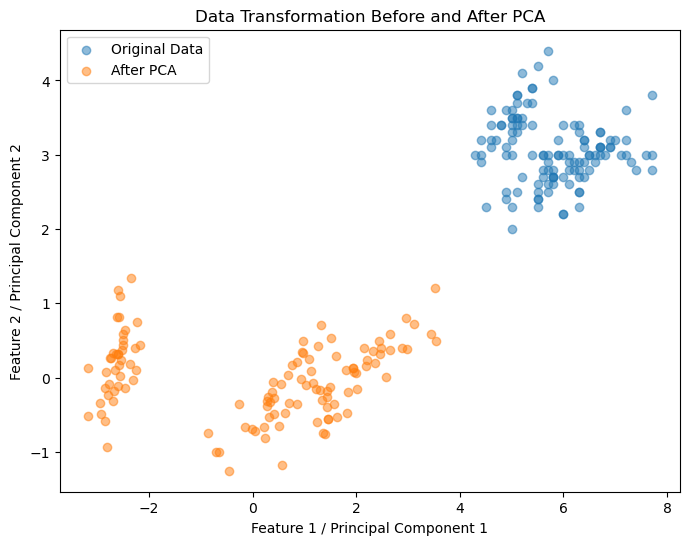

In [19]:
##40
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], label="Original Data", alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], label="After PCA", alpha=0.5)
plt.legend()
plt.xlabel("Feature 1 / Principal Component 1")
plt.ylabel("Feature 2 / Principal Component 2")
plt.title("Data Transformation Before and After PCA")
plt.show()



In [21]:
##41
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [23]:
##42
metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred = knn_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"Metric: {metric}, MSE: {mse:.4f}")


Metric: euclidean, MSE: 1432.6378
Metric: manhattan, MSE: 1474.2428
Metric: minkowski, MSE: 1432.6378


In [25]:
##43
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust for multi-class setting

y_pred_proba = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class="ovr")
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.8828


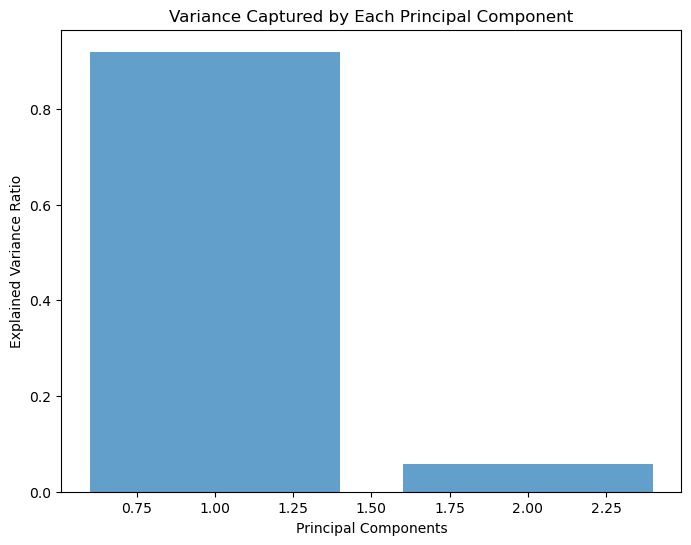

In [27]:
##44
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Captured by Each Principal Component")
plt.show()


In [29]:
##45
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {acc:.4f}")


Accuracy after feature selection: 0.7778


In [31]:
##46
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)
X_reconstructed = pca.inverse_transform(X_pca)

reconstruction_error = np.mean((X_train - X_reconstructed) ** 2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


Reconstruction Error: 0.1238


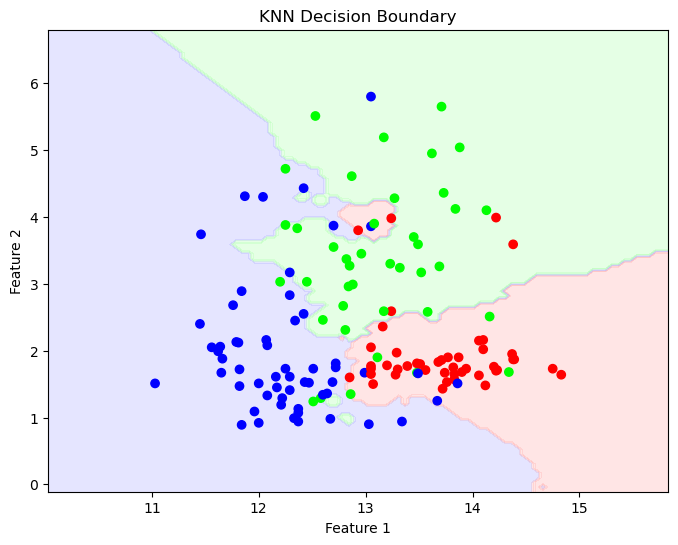

In [33]:
##47
from matplotlib.colors import ListedColormap
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[:, :2], y_train)  # Using only first two features for visualization

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary")
plt.show()


In [35]:
##48
num_components = [1, 2, 3, 5, 10]
for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    variance = sum(pca.explained_variance_ratio_)
    print(f"Number of Components: {n}, Explained Variance: {variance:.4f}")


Number of Components: 1, Explained Variance: 0.9978
Number of Components: 2, Explained Variance: 0.9998
Number of Components: 3, Explained Variance: 0.9999
Number of Components: 5, Explained Variance: 1.0000
Number of Components: 10, Explained Variance: 1.0000
